In [ ]:
import numpy as np

# Define the state space
state_space = [2199750, 2199750, 5520000,5520000, 5520000, 5520000,
               5740000, 5883500, 5883500,6084400, 6114400, 6572550, 7314000]

# Define the action space
action_space = [0, 1, 2]

# Define the reward function
def reward(state, action):
    if action == 0:
        return 0
    else:
        return state

# Initialize the Q-table
q_table = np.zeros((len(state_space), len(action_space)))

# Set hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Implement Q-learning algorithm
for i in range(10000):
    # Choose initial state
    state = np.random.choice(state_space)

    # Choose initial action using epsilon-greedy policy
    if np.random.uniform() < epsilon:
        action = np.random.choice(action_space)
    else:
        action = np.argmax(q_table[state_space.index(state), :])

    # Update Q-value for current state-action pair
    next_state = np.random.choice(state_space)
    reward_current = reward(state, action)
    q_table[state_space.index(state), action_space.index(action)] += alpha * (reward_current + gamma * np.max(q_table[state_space.index(next_state), :]) - q_table[state_space.index(state), action_space.index(action)])

# Print Q-table
print("Q-table:")
for i in range(len(state_space)):
    for j in range(len(action_space)):
        print(round(q_table[i, j], 2), end=" ")
    print()

Q-table:
45267014.91 48718452.72 50658642.82 
0.0 0.0 0.0 
48076720.17 53727866.38 53703880.36 
0.0 0.0 0.0 
0.0 0.0 0.0 
0.0 0.0 0.0 
41285457.23 54015136.53 45437654.06 
47777598.71 52509184.88 54439968.18 
0.0 0.0 0.0 
44389064.07 54641960.54 48655867.23 
38065151.67 49259575.38 54439836.66 
46301866.59 55075753.51 46842602.36 
38343799.35 56280580.17 47643157.83 


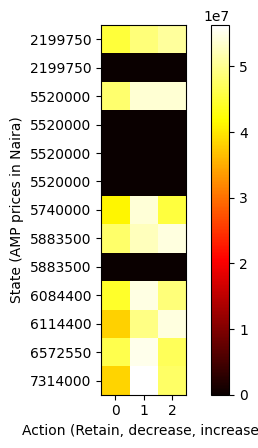

In [ ]:
import matplotlib.pyplot as plt

# Create a heat map of the Q-table
plt.imshow(q_table, cmap='hot', interpolation='nearest')
plt.xlabel('Action (Retain, decrease, increase)')
plt.ylabel('State (AMP prices in Naira)')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.yticks(range(len(state_space)), state_space)
plt.colorbar()
plt.show()